# Notebook Structure

1. Import necessary dependencies
2. Create dataset
3. Contingency table visualization for the categorical features
4. Interpretation of Contingency table


# 1. Import necessary dependencies

In [63]:
# libraries & dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="darkgrid")

# 2. Create the dataset

In [64]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

In [42]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
titanic.shape

(891, 15)

# 3. Contingency table visualization for the categorical features

### A. Contingengy tables are created and printed

In [50]:
# --- Contingency Tables ---
survived_pclass = pd.crosstab(titanic['survived'], titanic['pclass'])
survived_sex = pd.crosstab(titanic['survived'], titanic['sex'])
survived_embarked = pd.crosstab(titanic['survived'], titanic['embarked'])
survived_class = pd.crosstab(titanic['survived'], titanic['class'])
survived_adult_male = pd.crosstab(titanic['survived'], titanic['adult_male'])
survived_embark_town = pd.crosstab(titanic['survived'], titanic['embark_town'])
survived_alone = pd.crosstab(titanic['survived'], titanic['alone'])

In [66]:
print(survived_pclass)

pclass      1   2    3
survived              
0          80  97  372
1         136  87  119


### B. Visualize contingency table using Heatmap

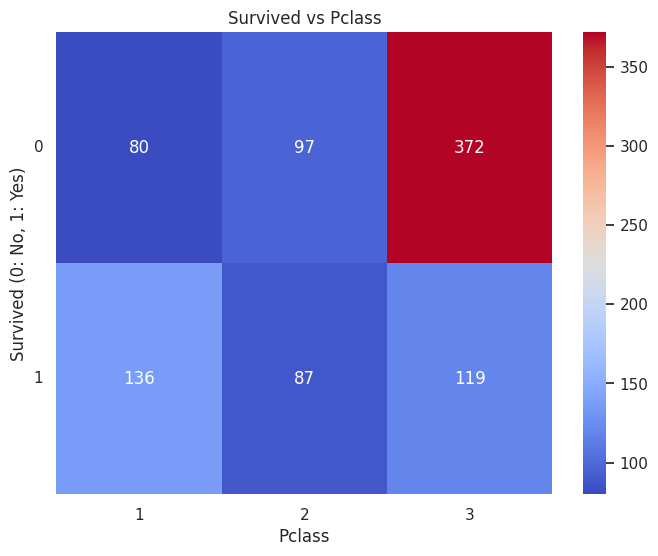

In [67]:
# Create the heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(survived_pclass, annot=True, cmap="coolwarm", fmt="d")
plt.title("Survived vs Pclass")
plt.xlabel("Pclass")
plt.ylabel("Survived (0: No, 1: Yes)")
plt.yticks(rotation=0)
plt.show()

### C. Visualize all the contingency table using heatmap

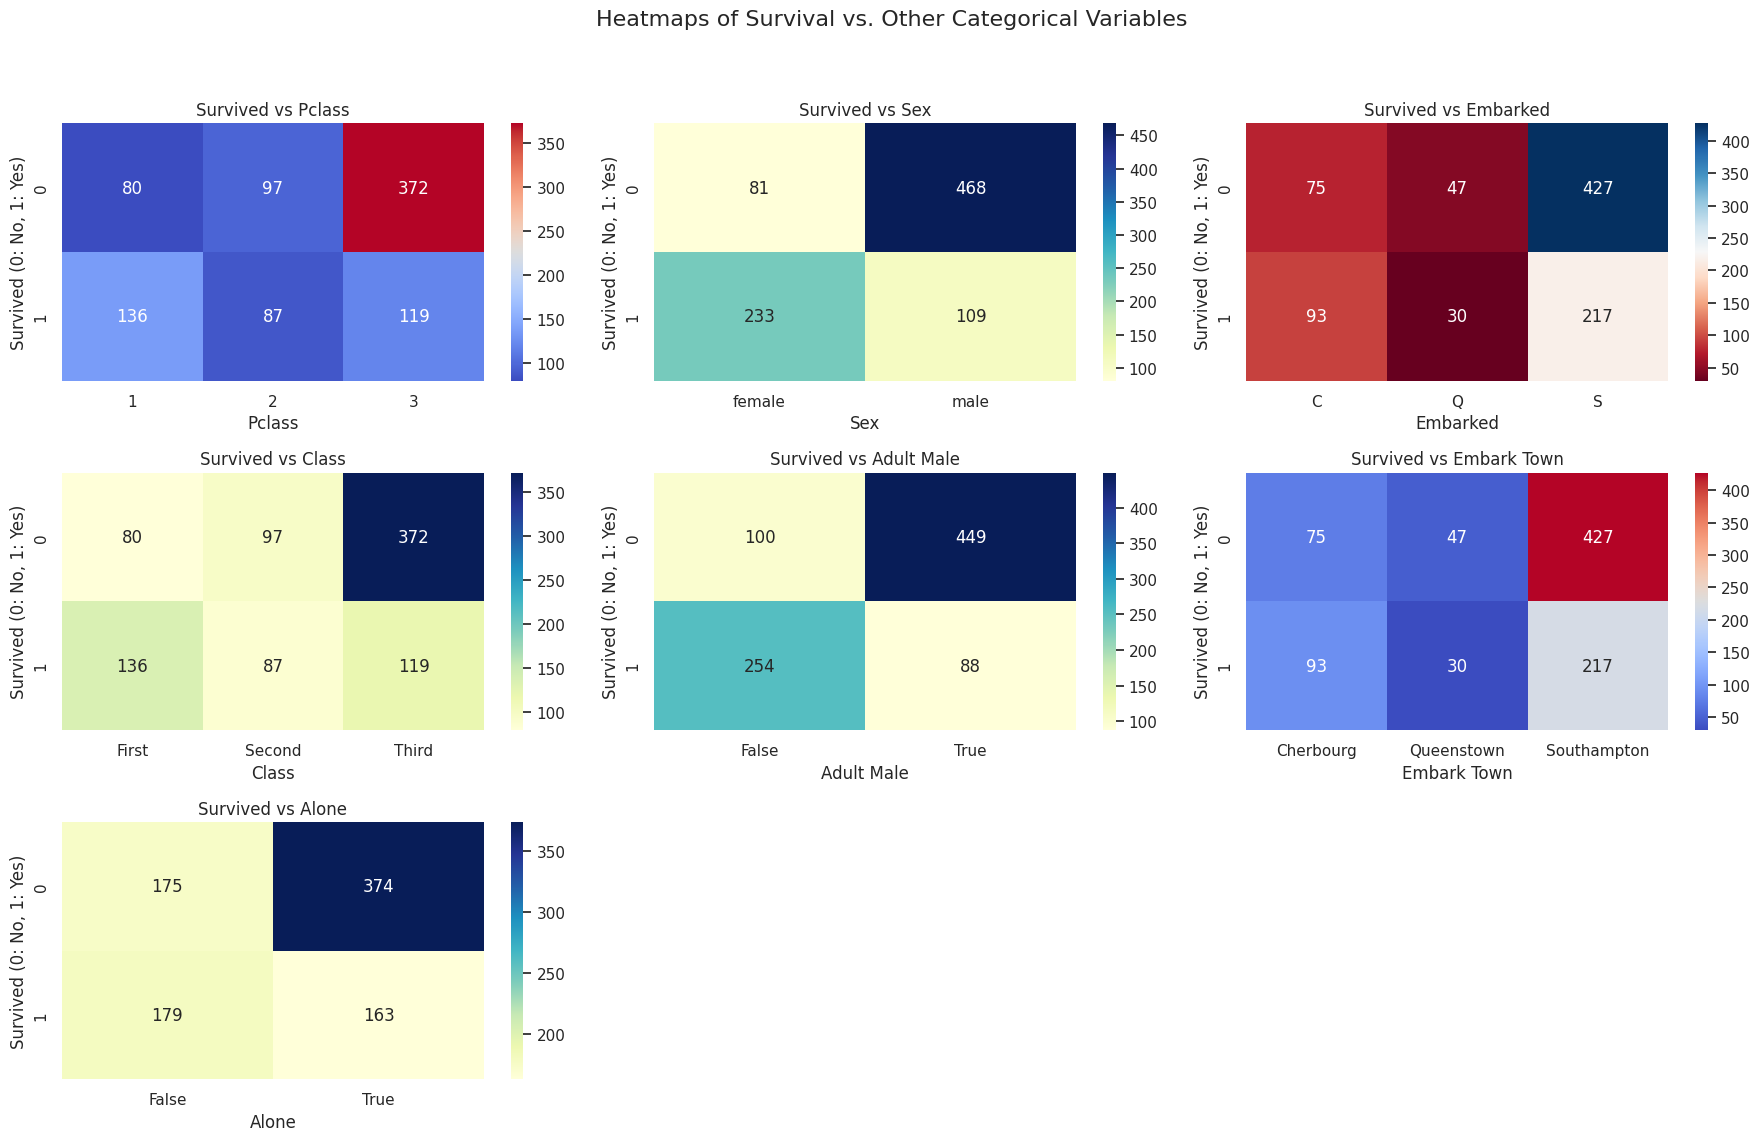

In [73]:
# --- Visualizing Contingency Tables with Heatmaps (3 per row) ---

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Heatmaps of Survival vs. Other Categorical Variables", fontsize=16, y=0.98)

# Row 1
sns.heatmap(survived_pclass, annot=True, cmap="coolwarm", fmt="d", ax=axes[0, 0])
axes[0, 0].set_title("Survived vs Pclass")
axes[0, 0].set_xlabel("Pclass")
axes[0, 0].set_ylabel("Survived (0: No, 1: Yes)")

sns.heatmap(survived_sex, annot=True, cmap="YlGnBu", fmt="d", ax=axes[0, 1])
axes[0, 1].set_title("Survived vs Sex")
axes[0, 1].set_xlabel("Sex")
axes[0, 1].set_ylabel("Survived (0: No, 1: Yes)")

sns.heatmap(survived_embarked, annot=True, cmap="RdBu", fmt="d", ax=axes[0, 2])
axes[0, 2].set_title("Survived vs Embarked")
axes[0, 2].set_xlabel("Embarked")
axes[0, 2].set_ylabel("Survived (0: No, 1: Yes)")

# Row 2
sns.heatmap(survived_class, annot=True, cmap="YlGnBu", fmt="d", ax=axes[1, 0])
axes[1, 0].set_title("Survived vs Class")
axes[1, 0].set_xlabel("Class")
axes[1, 0].set_ylabel("Survived (0: No, 1: Yes)")

sns.heatmap(survived_adult_male, annot=True, cmap="YlGnBu", fmt="d", ax=axes[1, 1])
axes[1, 1].set_title("Survived vs Adult Male")
axes[1, 1].set_xlabel("Adult Male")
axes[1, 1].set_ylabel("Survived (0: No, 1: Yes)")

sns.heatmap(survived_embark_town, annot=True, cmap="coolwarm", fmt="d", ax=axes[1, 2])
axes[1, 2].set_title("Survived vs Embark Town")
axes[1, 2].set_xlabel("Embark Town")
axes[1, 2].set_ylabel("Survived (0: No, 1: Yes)")

# Row 3
sns.heatmap(survived_alone, annot=True, cmap="YlGnBu", fmt="d", ax=axes[2, 0])
axes[2, 0].set_title("Survived vs Alone")
axes[2, 0].set_xlabel("Alone")
axes[2, 0].set_ylabel("Survived (0: No, 1: Yes)")

# Remove the unused subplots in the third row
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4. Interpretation of Contingency table

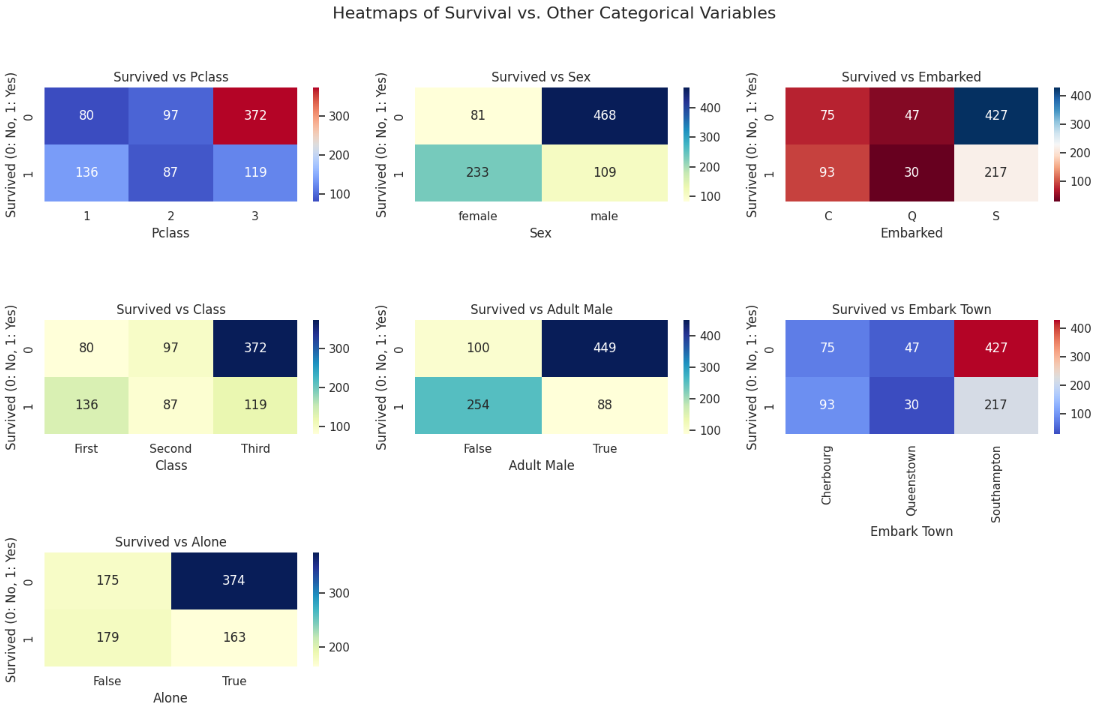

Overall Observations:

* The heatmaps visually represent the counts of passengers for each combination of 'Survived' and another categorical variable. By comparing the color intensities across the rows (Survived = 0 and Survived = 1) for each variable, we can infer potential associations.

Individual Heatmap Interpretations:

Survived vs Pclass:

* A very dark red cell at (Survived=0, Pclass=3) indicates a high number of passengers in 3rd class did not survive.
* The lighter blue cells at (Survived=1, Pclass=1) and (Survived=1, Pclass=2) suggest a higher number of survivors in the upper passenger classes compared to 3rd class.
* Interpretation: Passenger class appears to be strongly associated with survival. Passengers in higher classes had a better chance of survival.

Survived vs Sex:

* The dark blue cell at (Survived=0, Sex=male) shows a large number of males did not survive.
* The lighter yellow/green cell at (Survived=1, Sex=female) indicates a higher number of females survived compared to males.
* Interpretation: Gender is strongly associated with survival. Females had a significantly higher survival rate than males.

Survived vs Embarked:

* The dark red cell at (Survived=0, Embarked=S) suggests a high number of passengers who embarked at Southampton did not survive.
* The lighter blue cell at (Survived=1, Embarked=C) indicates a relatively higher number of survivors who embarked at Cherbourg.
* Interpretation: The port of embarkation seems to have some association with survival, with Cherbourg having a relatively higher survival rate.

Survived vs Class:

* This heatmap essentially shows the same information as 'Survived vs Pclass' but uses the categorical names ('First', 'Second', 'Third') instead of the numerical values. The interpretation remains the same: higher classes had better survival rates.

Survived vs Adult Male:

* The dark blue cell at (Survived=0, Adult Male=True) shows a large number of adult males did not survive.
* The lighter yellow/green cell at (Survived=1, Adult Male=False) indicates a higher number of non-adult males (which includes women and children) survived.
Interpretation: Being an adult male was strongly associated with a lower survival rate. This reinforces the 'women and children first' principle.

Survived vs Embark Town:

* This heatmap provides the same information as 'Survived vs Embarked' but uses the town names ('Cherbourg', 'Queenstown', 'Southampton'). The interpretation remains consistent: Cherbourg had a relatively higher survival rate, and Southampton had a higher number of non-survivors.

Survived vs Alone:

* The dark blue cell at (Survived=0, Alone=False) and (Survived=0, Alone=True) both show a substantial number of non-survivors, regardless of whether they were alone. However, the color intensity suggests slightly more non-survivors were not alone.
* The lighter yellow/green cells for survivors don't show a dramatic difference between being alone or not.
* Interpretation: The impact of being alone on survival is less pronounced compared to passenger class or gender, but there might be a slight tendency for those not alone to have a slightly lower survival count relative to their non-survival count.

In Summary:

These heatmaps strongly suggest that passenger class, gender, and being an adult male were significant factors in determining survival on the Titanic. Passengers in higher classes and females had much better chances of survival. The port of embarkation also shows some association, while being alone appears to have a less direct impact.